# COS575 Lab 4

##Tatiana Romanchishina

In [107]:
# load numpy and pandas for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%pylab inline

from pylab import *

# load statsmodels as alias ``sm``
import statsmodels.api as sm

# load the data
path = r'/Users/tatiana/COS575/lab1/Lab2/CHR2015.csv'
df = pd.read_csv(path)
df.shape

(3048, 70)

In [108]:
# remove NaNs
df_fix = df[~np.isnan(df.Premature_death_Value) & ~np.isnan(df.Adult_obesity_Value) &
           ~np.isnan(df.Diabetes_Value) & ~np.isnan(df.Homicide_rate_Value) &
            ~np.isnan(df.Limited_access_to_healthy_foods_Value) & ~np.isnan(df.Uninsured_Value) &
           ~np.isnan(df.Median_household_income_Value)]
df_fix.shape

(1283, 70)

###Choose six potentially relevant predictors and for each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. (Note that you can use iteration to make this task easier)

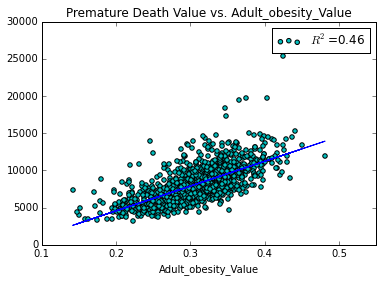

                              OLS Regression Results                             
Dep. Variable:     Premature_death_Value   R-squared:                       0.461
Model:                               OLS   Adj. R-squared:                  0.461
Method:                    Least Squares   F-statistic:                     1096.
Date:                   Wed, 30 Sep 2015   Prob (F-statistic):          3.52e-174
Time:                           13:01:39   Log-Likelihood:                -11415.
No. Observations:                   1283   AIC:                         2.283e+04
Df Residuals:                       1281   BIC:                         2.284e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
cons

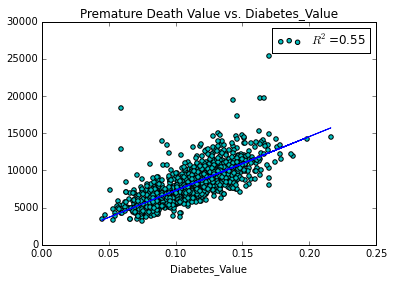

                              OLS Regression Results                             
Dep. Variable:     Premature_death_Value   R-squared:                       0.555
Model:                               OLS   Adj. R-squared:                  0.554
Method:                    Least Squares   F-statistic:                     1595.
Date:                   Wed, 30 Sep 2015   Prob (F-statistic):          2.88e-227
Time:                           13:01:39   Log-Likelihood:                -11293.
No. Observations:                   1283   AIC:                         2.259e+04
Df Residuals:                       1281   BIC:                         2.260e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const         

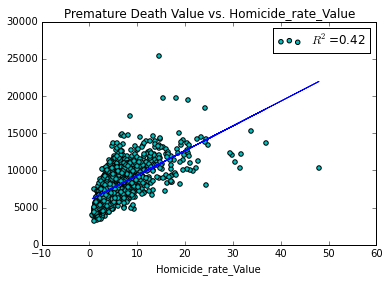

                              OLS Regression Results                             
Dep. Variable:     Premature_death_Value   R-squared:                       0.424
Model:                               OLS   Adj. R-squared:                  0.424
Method:                    Least Squares   F-statistic:                     944.5
Date:                   Wed, 30 Sep 2015   Prob (F-statistic):          7.88e-156
Time:                           13:01:39   Log-Likelihood:                -11457.
No. Observations:                   1283   AIC:                         2.292e+04
Df Residuals:                       1281   BIC:                         2.293e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
cons

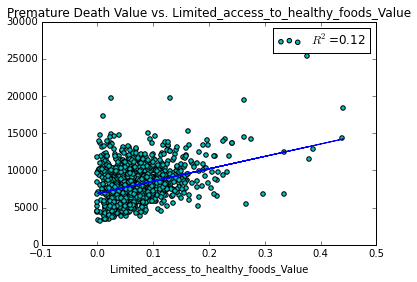

                              OLS Regression Results                             
Dep. Variable:     Premature_death_Value   R-squared:                       0.116
Model:                               OLS   Adj. R-squared:                  0.116
Method:                    Least Squares   F-statistic:                     168.7
Date:                   Wed, 30 Sep 2015   Prob (F-statistic):           2.51e-36
Time:                           13:01:39   Log-Likelihood:                -11732.
No. Observations:                   1283   AIC:                         2.347e+04
Df Residuals:                       1281   BIC:                         2.348e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------

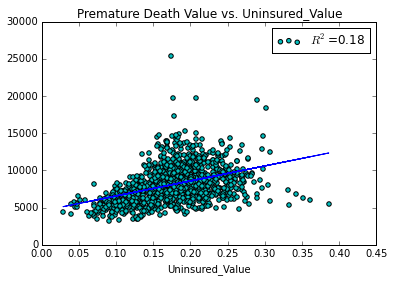

                              OLS Regression Results                             
Dep. Variable:     Premature_death_Value   R-squared:                       0.178
Model:                               OLS   Adj. R-squared:                  0.177
Method:                    Least Squares   F-statistic:                     277.4
Date:                   Wed, 30 Sep 2015   Prob (F-statistic):           1.58e-56
Time:                           13:01:40   Log-Likelihood:                -11686.
No. Observations:                   1283   AIC:                         2.338e+04
Df Residuals:                       1281   BIC:                         2.339e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const       

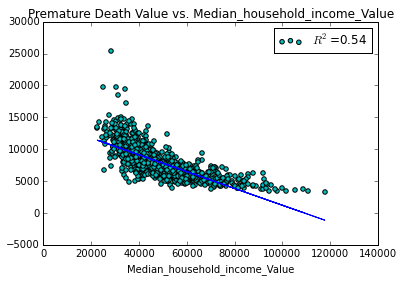

                              OLS Regression Results                             
Dep. Variable:     Premature_death_Value   R-squared:                       0.542
Model:                               OLS   Adj. R-squared:                  0.542
Method:                    Least Squares   F-statistic:                     1517.
Date:                   Wed, 30 Sep 2015   Prob (F-statistic):          1.32e-219
Time:                           13:01:40   Log-Likelihood:                -11310.
No. Observations:                   1283   AIC:                         2.262e+04
Df Residuals:                       1281   BIC:                         2.264e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------

[33352.971575490497,
 72532.176285408743,
 332.46135916298175,
 16662.170843683914,
 20205.679638177193,
 -0.13186433471484149]

In [149]:

predictors = ['Adult_obesity_Value', 'Diabetes_Value', 'Homicide_rate_Value', 'Limited_access_to_healthy_foods_Value',
             'Uninsured_Value', 'Median_household_income_Value']
un_params = []
for pred in predictors:
    y = df_fix['Premature_death_Value']  # response
    X = df_fix[pred]                     # predictor
    X_c = sm.add_constant(X)  # Adds a constant term to the predictor 
    est = sm.OLS(y, X_c)
    est = est.fit()
    est.summary()
    un_params.append(est.params[1])

    # plot a scatter plot for each pair 
    # display R^2 label as the legend
    plt.scatter(X, y, c="c", label = '$R^2$=%.2f' % est.rsquared)
    plt.legend()
    
    # get the coefficients to plot the line
    # numpy.polyfit returns a vector of coefficients that minimizes the squared error
    a, b = np.polyfit(X, y, 1)
    plt.plot(X, a*X + b, 'b')
    
    # add X-axis label and title
    plt.xlabel(pred)
    plt.title("Premature Death Value vs. " + pred)
        
    plt.show()
    
    print(est.summary())

un_params

####I chose the following predictors for my OLS models: 'Adult_obesity_Value', 'Diabetes_Value', 'Homicide_rate_Value', 'Limited_access_to_healthy_foods_Value', 'Uninsured_Value', 'Median_household_income_Value'. According to the p-value from the regression summary of each model, all of the predictors have a significant relationship with the response - 'Premature_death_Value'. However, the $R^2$ value, which measures the proportion of variability in the response explained by the predictor, gives a different view on these relationships. The highest $R^2$ value of 0.55 was achieved using the predictor 'Diabetes_Value'. Even though it is the highest $R^2$ value for the current models, it is not very high in general, which makes these models much less convincing. 'Limited_access_to_healthy_foods_Value' and 'Uninsured_Value' had the lowest $R^2$ values of 0.12 and 0.18 respectively which most likely means that these models are not reliable. The predictors 'Diabetes_Value' and 'Median_household_income_Value' produced models with $R^2$>0.5. They could be used, though perhaps with care. But 'Homicide_rate_Value' and 'Adult_obesity_Value' produced models with .4<$R^2$<.5 which makes me uncertain on whether they can be considered accurate. 

###Fit a multiple regression model to predict the response using all of the predictors you chose. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [110]:
import statsmodels.formula.api as smf
X = df_fix[['Adult_obesity_Value', 'Diabetes_Value', 'Homicide_rate_Value', 'Limited_access_to_healthy_foods_Value',
             'Uninsured_Value', 'Median_household_income_Value']]
y = df_fix['Premature_death_Value']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

print(est.summary())
mu_params = est.params[1:].values.tolist()
mu_params

                              OLS Regression Results                             
Dep. Variable:     Premature_death_Value   R-squared:                       0.725
Model:                               OLS   Adj. R-squared:                  0.723
Method:                    Least Squares   F-statistic:                     559.7
Date:                   Wed, 30 Sep 2015   Prob (F-statistic):               0.00
Time:                           11:54:27   Log-Likelihood:                -10984.
No. Observations:                   1283   AIC:                         2.198e+04
Df Residuals:                       1276   BIC:                         2.202e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------

[4750.857844318407,
 30773.4678204815,
 129.17980943189164,
 3022.9765985195318,
 1996.8181181250613,
 -0.053511910708511586]

####The multiple regression model has the $R^2$ value of 0.725 which is higher than any of the OLS models. It seems all the predictors are significant according to the p-values.

###How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

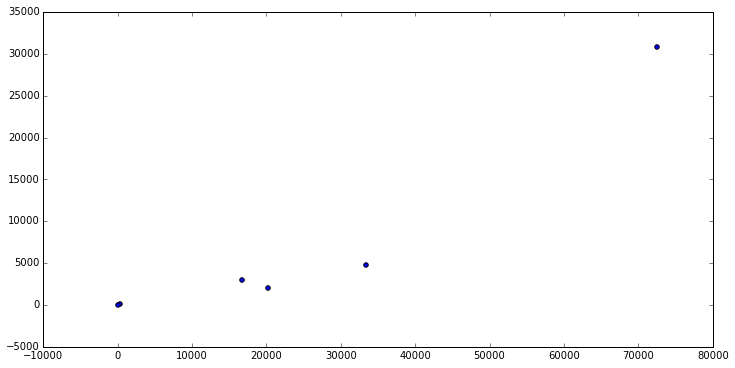

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(x=un_params, y=mu_params)
plt.show()

###Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = β0 + β1 * X + β2 * X^2 + β3 * X^3 

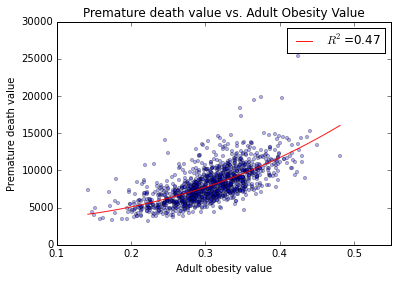

In [162]:
# 'Adult_obesity_Value'
x = pd.DataFrame({'Adult_obesity_Value': np.linspace(df_fix.Adult_obesity_Value.min(), 
                                                       df_fix.Adult_obesity_Value.max(), 100)})
plt.scatter(df_fix.Adult_obesity_Value, df_fix.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Adult obesity value')
plt.ylabel('Premature death value')

poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + I(Adult_obesity_Value ** 2.0) + I(Adult_obesity_Value ** 3.0)', 
                 data=df_fix).fit()
plt.plot(x.Adult_obesity_Value, poly_1.predict(x), 'r-', alpha=0.9,
         label='$R^2$=%.2f' % poly_1.rsquared)

plt.legend()
plt.title("Premature death value vs. Adult Obesity Value")

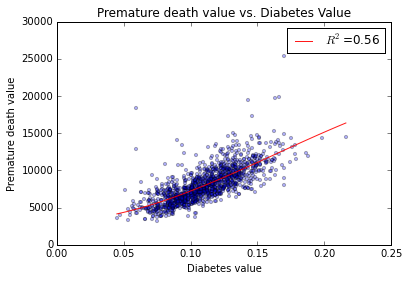

In [163]:
#'Diabetes_Value'
x = pd.DataFrame({'Diabetes_Value': np.linspace(df_fix.Diabetes_Value.min(), 
                                                       df_fix.Diabetes_Value.max(), 100)})
plt.scatter(df_fix.Diabetes_Value, df_fix.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Diabetes value')
plt.ylabel('Premature death value')

poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + I(Diabetes_Value ** 2.0) + I(Diabetes_Value ** 3.0)', 
                 data=df_fix).fit()
plt.plot(x.Diabetes_Value, poly_1.predict(x), 'r-', alpha=0.9,
         label='$R^2$=%.2f' % poly_1.rsquared)

plt.legend()
plt.title("Premature death value vs. Diabetes Value")

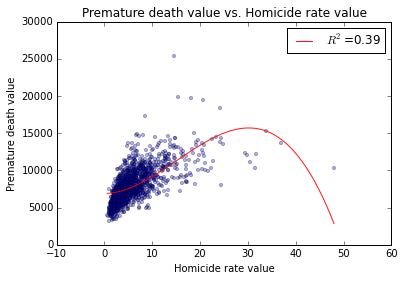

In [167]:
# 'Homicide_rate_Value'
x = pd.DataFrame({'Homicide_rate_Value': np.linspace(df_fix.Homicide_rate_Value.min(), 
                                                       df_fix.Homicide_rate_Value.max(), 100)})
plt.scatter(df_fix.Homicide_rate_Value, df_fix.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Homicide rate value')
plt.ylabel('Premature death value')

poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + I(Homicide_rate_Value ** 2.0) + I(Homicide_rate_Value ** 3.0)', 
                 data=df_fix).fit()
plt.plot(x.Homicide_rate_Value, poly_1.predict(x), 'r-', alpha=0.9,
         label='$R^2$=%.2f' % poly_1.rsquared)

plt.legend()
plt.title("Premature death value vs. Homicide rate value")

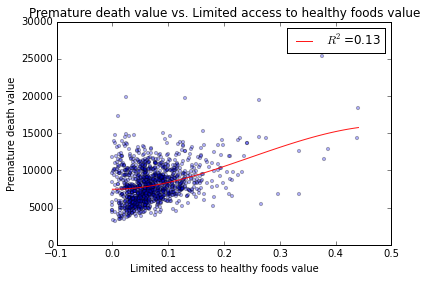

In [165]:
#'Limited_access_to_healthy_foods_Value'
x = pd.DataFrame({'Limited_access_to_healthy_foods_Value': np.linspace(df_fix.Limited_access_to_healthy_foods_Value.min(), 
                                                       df_fix.Limited_access_to_healthy_foods_Value.max(), 100)})
plt.scatter(df_fix.Limited_access_to_healthy_foods_Value, df_fix.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Limited access to healthy foods value')
plt.ylabel('Premature death value')

poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + I(Limited_access_to_healthy_foods_Value ** 2.0) + I(Limited_access_to_healthy_foods_Value ** 3.0)', 
                 data=df_fix).fit()
plt.plot(x.Limited_access_to_healthy_foods_Value, poly_1.predict(x), 'r-', alpha=0.9,
         label='$R^2$=%.2f' % poly_1.rsquared)

plt.legend()
plt.title("Premature death value vs. Limited access to healthy foods value")

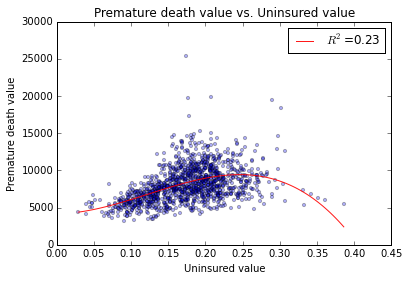

In [168]:
# 'Uninsured_Value'
x = pd.DataFrame({'Uninsured_Value': np.linspace(df_fix.Uninsured_Value.min(), 
                                                       df_fix.Uninsured_Value.max(), 100)})
plt.scatter(df_fix.Uninsured_Value, df_fix.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Uninsured value')
plt.ylabel('Premature death value')

poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + I(Uninsured_Value ** 2.0) + I(Uninsured_Value ** 3.0)', 
                 data=df_fix).fit()
plt.plot(x.Uninsured_Value, poly_1.predict(x), 'r-', alpha=0.9,
         label='$R^2$=%.2f' % poly_1.rsquared)

plt.legend()
plt.title("Premature death value vs. Uninsured value")

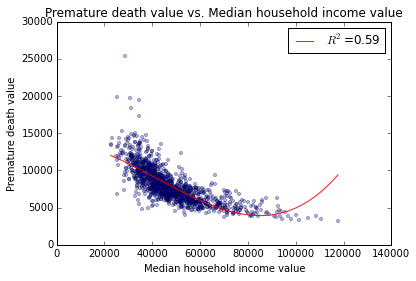

In [169]:
# 'Median_household_income_Value'
x = pd.DataFrame({'Median_household_income_Value': np.linspace(df_fix.Median_household_income_Value.min(), 
                                                       df_fix.Median_household_income_Value.max(), 100)})
plt.scatter(df_fix.Median_household_income_Value, df_fix.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Median household income value')
plt.ylabel('Premature death value')

poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + I(Median_household_income_Value ** 2.0) + I(Median_household_income_Value ** 3.0)', 
                 data=df_fix).fit()
plt.plot(x.Median_household_income_Value, poly_1.predict(x), 'r-', alpha=0.9,
         label='$R^2$=%.2f' % poly_1.rsquared)

plt.legend()
plt.title("Premature death value vs. Median household income value")

####The highest $R^2$ value of 0.59 was produced by a non linear model with 'Median_household_income_Value' as the predictor. The second highest $R^2$ value of 0.56 was produced by a non linear model with 'Diabetes_Value'.